[View in Colaboratory](https://colab.research.google.com/github/jswall/tftutorial/blob/master/test1.ipynb)

Epoch 1/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.4949 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3757 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3359 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.3110 - acc: 0.8857
Epoch 5/5
10000/10000 [==============================] - 1s 74us/step
Test accuracy: 0.8787


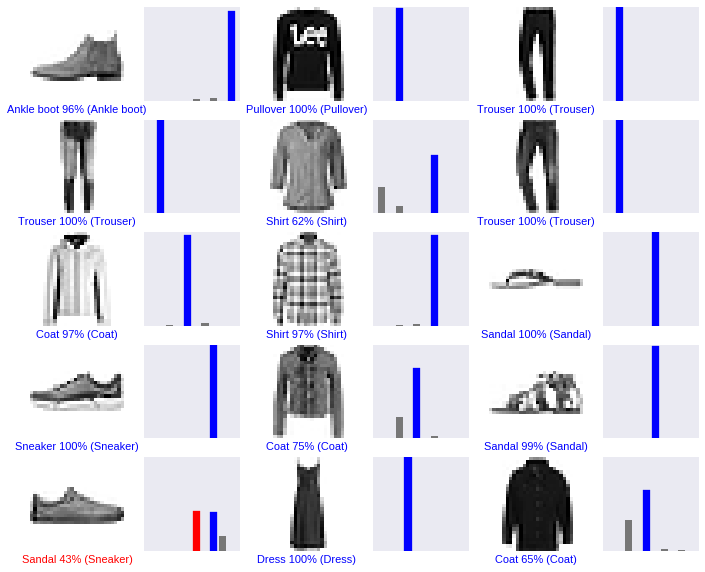

In [28]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plotImage(idx):
  plt.figure()
  plt.imshow(train_images[idx])
  plt.colorbar()
  plt.grid(False)
  

def plotImages():
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  pred_name = class_names[predicted_label]
  true_name = class_names[true_label]
  plt.xlabel("{} {:2.0f}% ({})".format(pred_name, 100*np.max(predictions_array), true_name), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

#plotImages()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # transform to 1-d array
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
#print(predictions[0])
#label_idx = np.argmax(predictions[0])
#plotImage(0)
#print(class_names[label_idx])

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)